## Predicting the obesity level of patients

The following project addresses the classification problem of estimating and predicting the obesity level of people.
Data were published in: 
Estimation of Obesity Levels Based On Eating Habits and Physical Condition  [Dataset]. (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5H31Z.

Firstly, data are modified for porper handling, followed by the testing of different classification models.
Secondly, the model is optimized with GridSearch.

Code was optimized and generated with ChatGPT.

In [6]:
import pandas as pd #for handling dataframes

df = pd.read_csv(r'C:\Users\Sabrina\OneDrive\Desktop\David_work\Python\ObesityDataSet_raw_and_data_sinthetic.csv') # import the file

In [8]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# This dataset estimates the obesity levels of people from different countries
Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico
By Fabio Mendoza Palechor, Alexis De la Hoz Manotas. 2019

Published in Data in Brief

In [11]:
# firstly rename the column names to make things more easy to understand

# Renaming columns
column_names = {
    "Gender": "gender",
    "Age": "age",
    "Height": "height_cm",
    "Weight": "weight_kg",
    "family_history_with_overweight": "family_history_obesity",
    "FAVC": "frequent_high_caloric_food",
    "FCVC": "vegetable_consumption",
    "NCP": "main_meals_per_day",
    "CAEC": "snack_frequency",
    "SMOKE": "smoking_habit",
    "CH2O": "water_intake",
    "SCC": "caloric_sweet_consumption",
    "FAF": "physical_activity_frequency",
    "TUE": "technology_usage_hours",
    "CALC": "alcohol_consumption",
    "MTRANS": "mode_of_transportation",
    "NOObeyesdad": "obesity_level"
}

df.rename(columns=column_names, inplace=True)

# Display renamed DataFrame
df


,gender,age,height_cm,weight_kg,family_history_obesity,frequent_high_caloric_food,vegetable_consumption,main_meals_per_day,snack_frequency,smoking_habit,water_intake,caloric_sweet_consumption,physical_activity_frequency,technology_usage_hours,alcohol_consumption,mode_of_transportation,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# Perform some Exploratory Data Analysis

In [14]:
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt #for plotting graphs

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       2111 non-null   object 
 1   age                          2111 non-null   float64
 2   height_cm                    2111 non-null   float64
 3   weight_kg                    2111 non-null   float64
 4   family_history_obesity       2111 non-null   object 
 5   frequent_high_caloric_food   2111 non-null   object 
 6   vegetable_consumption        2111 non-null   float64
 7   main_meals_per_day           2111 non-null   float64
 8   snack_frequency              2111 non-null   object 
 9   smoking_habit                2111 non-null   object 
 10  water_intake                 2111 non-null   float64
 11  caloric_sweet_consumption    2111 non-null   object 
 12  physical_activity_frequency  2111 non-null   float64
 13  technology_usage_h

In [18]:
# Does the dataset contains missing values?
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 gender                         0
age                            0
height_cm                      0
weight_kg                      0
family_history_obesity         0
frequent_high_caloric_food     0
vegetable_consumption          0
main_meals_per_day             0
snack_frequency                0
smoking_habit                  0
water_intake                   0
caloric_sweet_consumption      0
physical_activity_frequency    0
technology_usage_hours         0
alcohol_consumption            0
mode_of_transportation         0
NObeyesdad                     0
dtype: int64


In [20]:
# Provide some statistics
df.describe()

,age,height_cm,weight_kg,vegetable_consumption,main_meals_per_day,water_intake,physical_activity_frequency,technology_usage_hours
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [22]:
# The age of all people ranges from children (14) to adults (61)

In [24]:
# check the distribution of answers for each columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nValue Counts for {col}:\n", df[col].value_counts())


Value Counts for gender:
 gender
Male      1068
Female    1043
Name: count, dtype: int64

Value Counts for family_history_obesity:
 family_history_obesity
yes    1726
no      385
Name: count, dtype: int64

Value Counts for frequent_high_caloric_food:
 frequent_high_caloric_food
yes    1866
no      245
Name: count, dtype: int64

Value Counts for snack_frequency:
 snack_frequency
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

Value Counts for smoking_habit:
 smoking_habit
no     2067
yes      44
Name: count, dtype: int64

Value Counts for caloric_sweet_consumption:
 caloric_sweet_consumption
no     2015
yes      96
Name: count, dtype: int64

Value Counts for alcohol_consumption:
 alcohol_consumption
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

Value Counts for mode_of_transportation:
 mode_of_transportation
Public_Transportation    1580
Automobile                457
Walking 

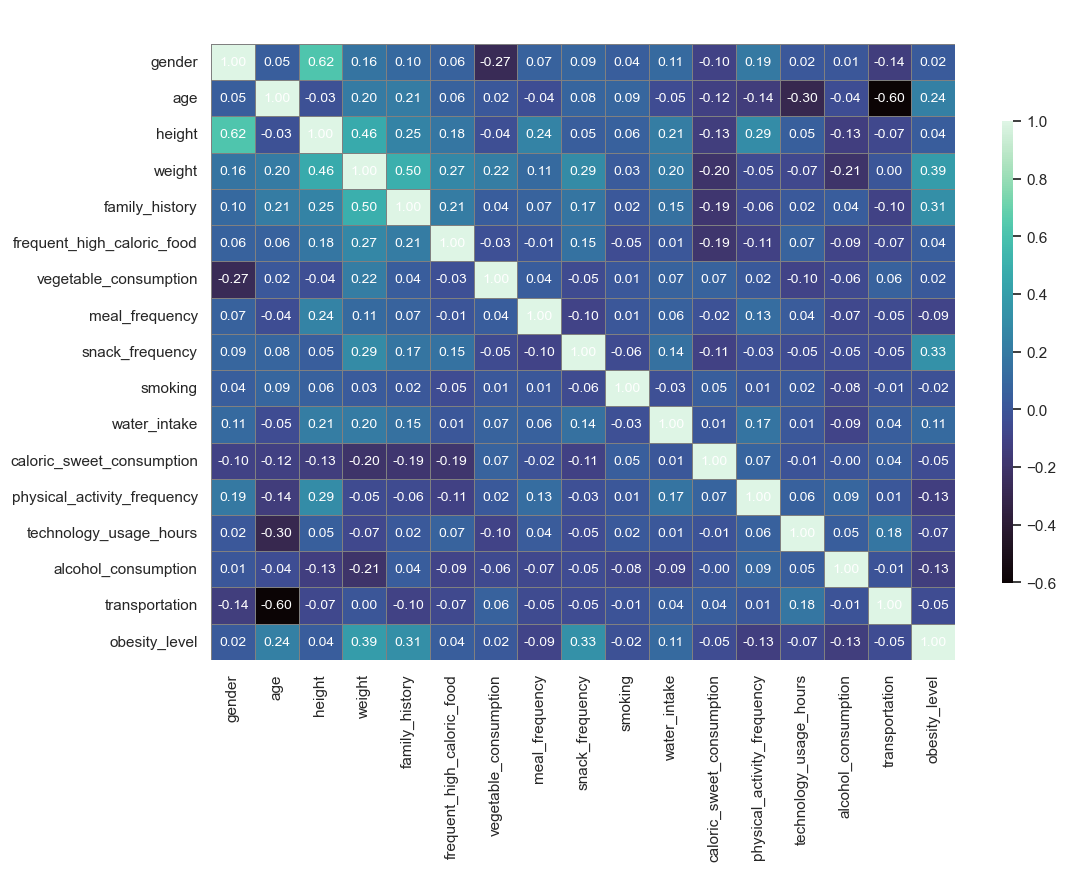

In [119]:
# make a heatmap to visualize correlations
# Set dark background theme
sns.set_theme(style="dark")

# Create the figure with a larger size for better readability
plt.figure(figsize=(12, 8))

# Generate the heatmap with enhanced styling
ax = sns.heatmap(
    df.select_dtypes(include=['number']).corr(),  # Select numerical columns and compute correlation
    annot=True,  # Show values
    cmap="mako",  # Dark-friendly colormap
    fmt=".2f",  # Format values to 2 decimal places
    linewidths=0.5,  # Add small gaps between cells
    linecolor="gray",  # Set line color for better visibility
    annot_kws={"size": 10, "color": "white"},  # Change annotation size and color
    cbar_kws={"shrink": 0.75, "aspect": 40},  # Adjust color bar size
)

# Customize the title for better visibility
plt.title("Correlation Matrix", fontsize=14, color="white", fontweight="bold", pad=15)

# Display the heatmap
plt.show()

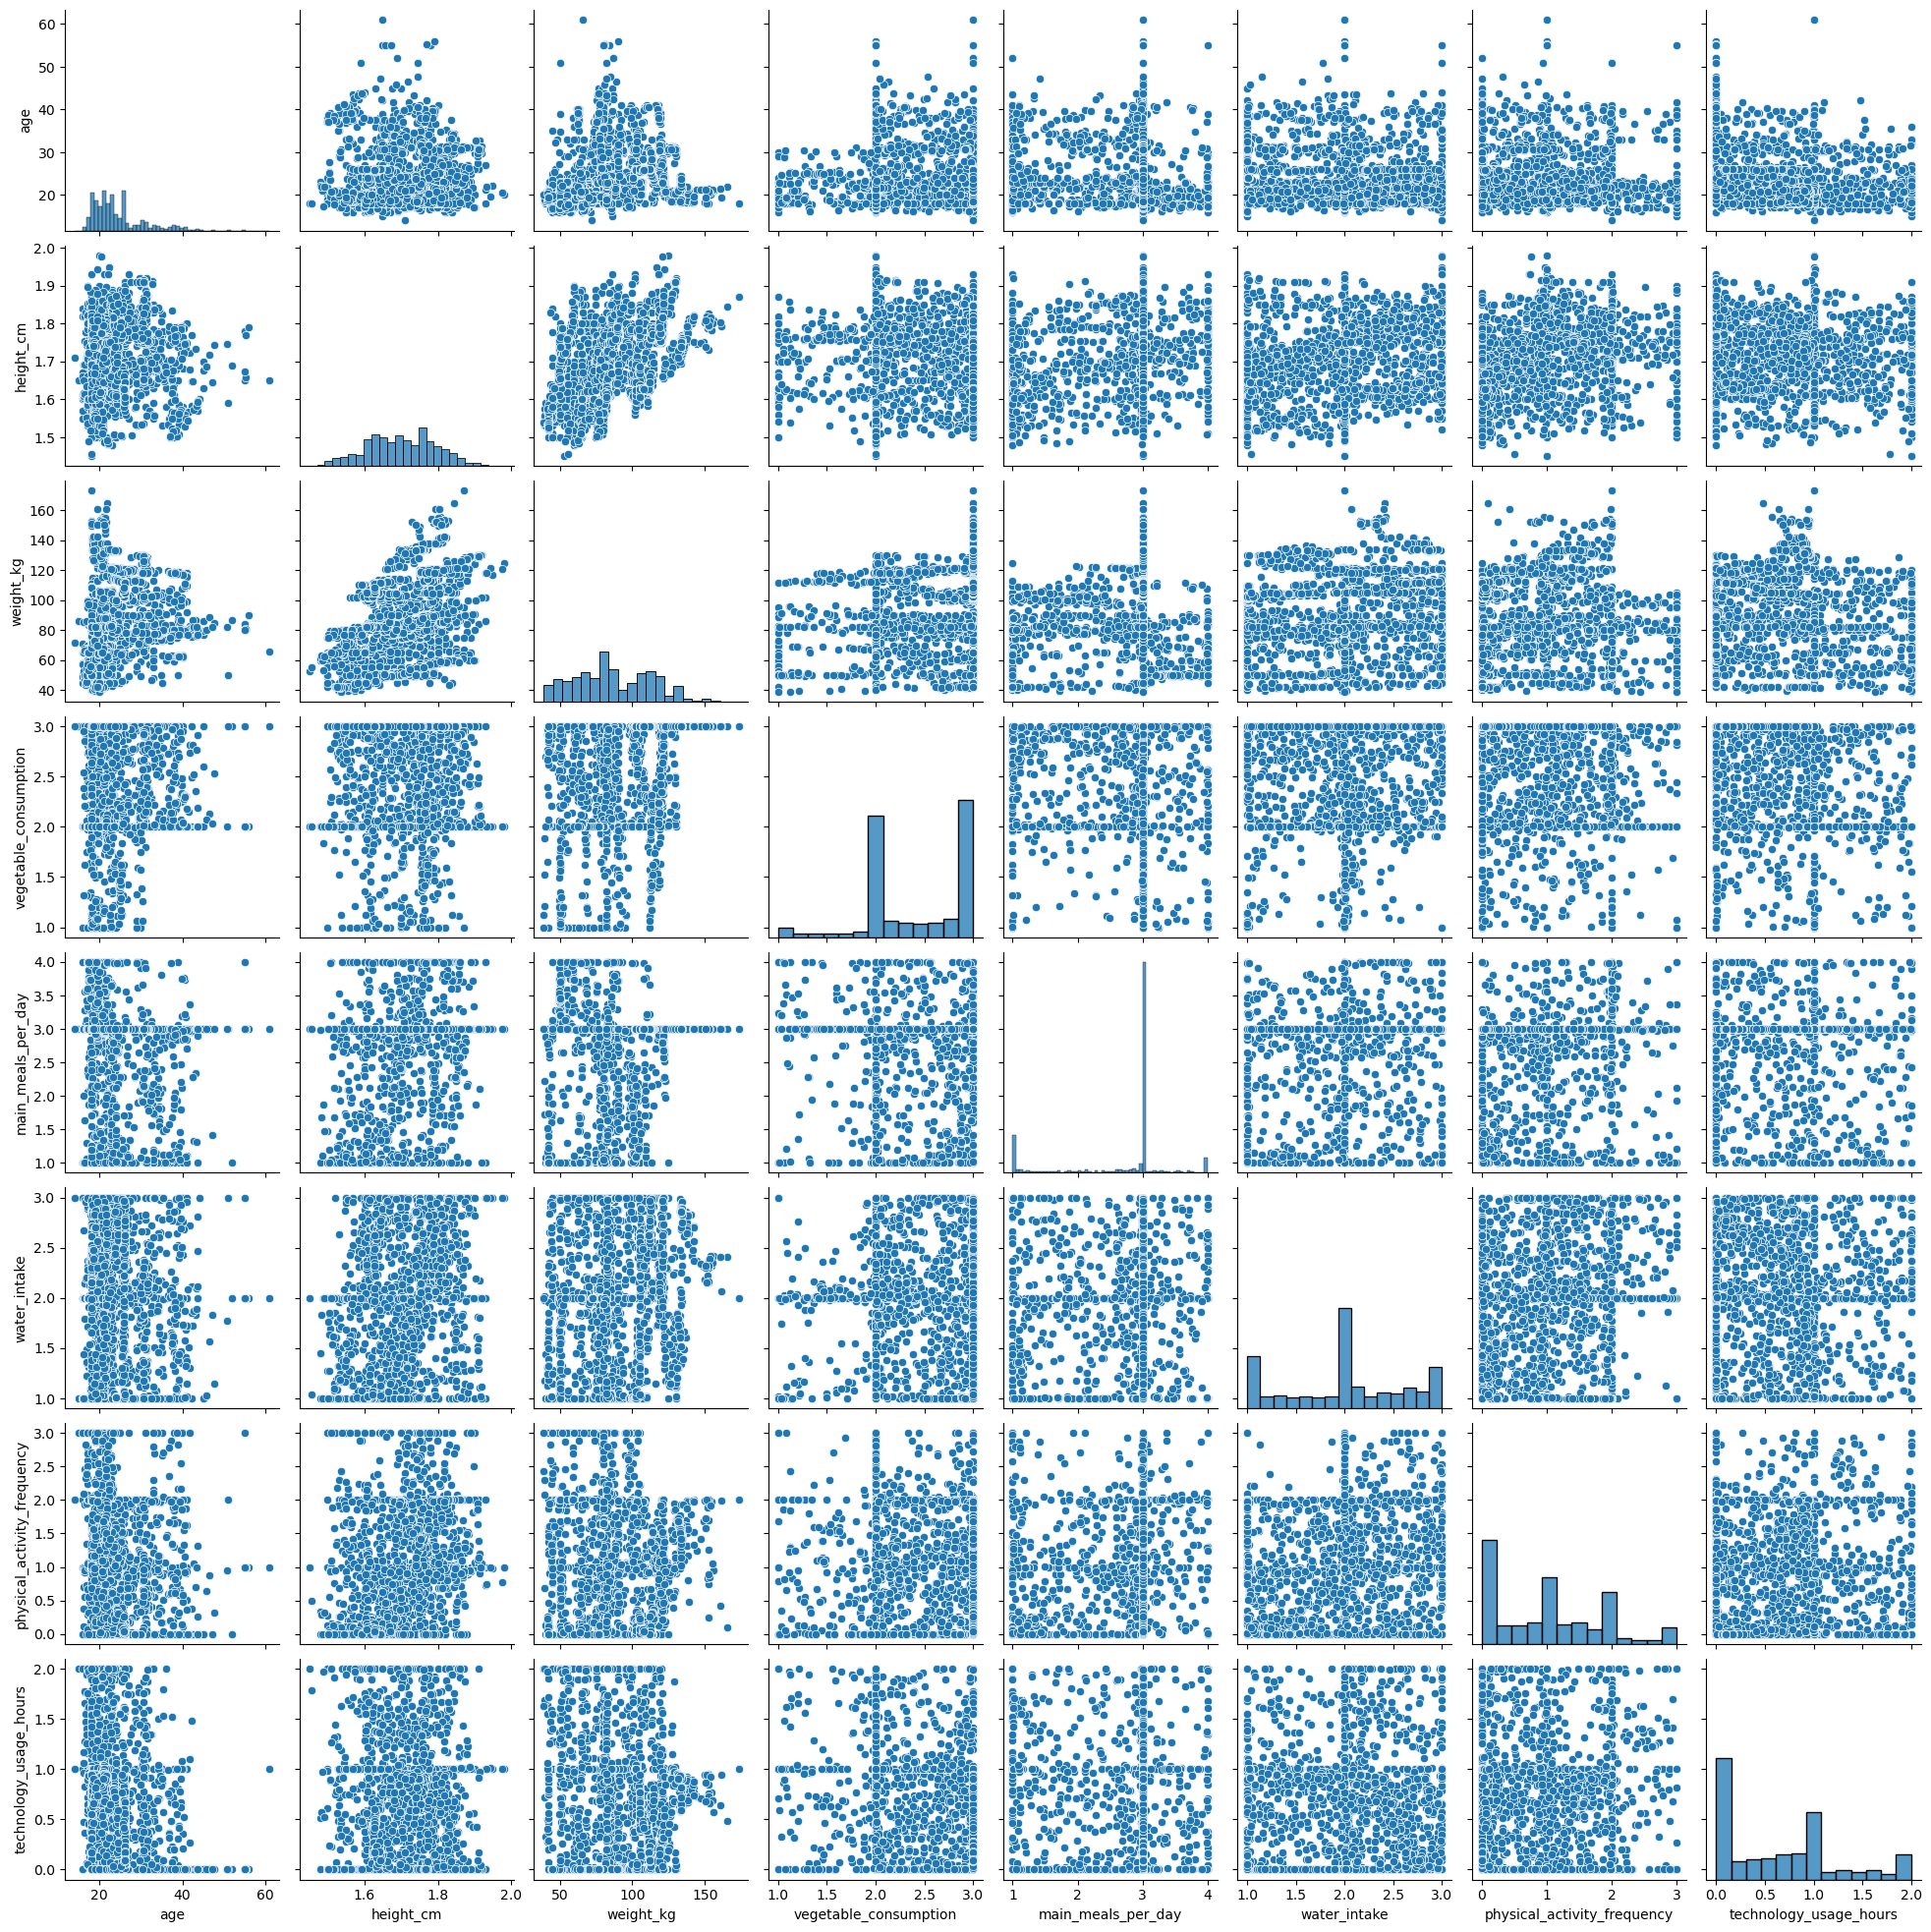

In [28]:
sns.pairplot(df.select_dtypes(include=['number']))
plt.show()

There is no real correlation between variables.

# Can we predict the obesity category? - Classification

# Test Machine Learning models

In [37]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [39]:
df.head()

,gender,age,height_cm,weight_kg,family_history_obesity,frequent_high_caloric_food,vegetable_consumption,main_meals_per_day,snack_frequency,smoking_habit,water_intake,caloric_sweet_consumption,physical_activity_frequency,technology_usage_hours,alcohol_consumption,mode_of_transportation,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [51]:
# Renaming columns
column_names = {
    "height_cm": "height",
    "weight_kg": "weight",
    "family_history_obesity": "family_history",
    "frequent_high_caloric_food": "frequent_high_caloric_food",
    "vegetable_consumption": "vegetable_consumption",
    "main_meals_per_day": "meal_frequency",
    "CAEC": "snack_frequency",
    "smoking_habit": "smoking",
    "CH2O": "water_intake",
    "SCC": "caloric_sweet_consumption",
    "FAF": "physical_activity",
    "TUE": "technology_usage_hours",
    "CALC": "alcohol_consumption",
    "mode_of_transportation": "transportation",
    "NObeyesdad": "obesity_level"
}

df.rename(columns=column_names, inplace=True)

# Display renamed DataFrame
df

,gender,age,height,weight,family_history,frequent_high_caloric_food,vegetable_consumption,meal_frequency,snack_frequency,smoking,water_intake,caloric_sweet_consumption,physical_activity_frequency,technology_usage_hours,alcohol_consumption,transportation,obesity_level
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [57]:
# Encode categorical variables
categorical_cols = ["gender", "family_history", "frequent_high_caloric_food", "snack_frequency",
                    "smoking", "caloric_sweet_consumption", "alcohol_consumption", "transportation", "obesity_level"]

label_encoders = {} #store future encoders
for col in categorical_cols:
    le = LabelEncoder() #initialize
    df[col] = le.fit_transform(df[col]) #transform to numerical format
    label_encoders[col] = le 

In [65]:
# What is the target variable? - Obesity level
X = df.drop(columns=["obesity_level"])
y = df["obesity_level"]
X
y

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: obesity_level, Length: 2111, dtype: int32

In [71]:
#Standardize values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.01191369, -0.52212439, -0.87558934, ...,  0.56199675,
         1.4191716 ,  0.50333674],
       [-1.01191369, -0.52212439, -1.94759928, ..., -1.08062463,
        -0.52115952,  0.50333674],
       [ 0.98822657, -0.20688898,  1.05402854, ...,  0.56199675,
        -2.46149063,  0.50333674],
       ...,
       [-1.01191369, -0.28190933,  0.54167211, ..., -0.01901815,
        -0.52115952,  0.50333674],
       [-1.01191369,  0.00777624,  0.40492652, ..., -0.11799101,
        -0.52115952,  0.50333674],
       [-1.01191369, -0.10211908,  0.39834438, ...,  0.09243207,
        -0.52115952,  0.50333674]])

In [73]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1688, 16)
Testing set shape: (423, 16)


# 1. Logistic Regression

In [76]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8747044917257684
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        56
           1       0.91      0.63      0.74        62
           2       0.93      0.90      0.92        78
           3       0.89      0.97      0.93        58
           4       1.00      1.00      1.00        63
           5       0.77      0.79      0.78        56
           6       0.76      0.84      0.80        50

    accuracy                           0.87       423
   macro avg       0.87      0.87      0.87       423
weighted avg       0.88      0.87      0.87       423



In [78]:
# Accuracy of 0.87

# 2. Random Forest Classifier

In [81]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9574468085106383
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.90      0.90      0.90        62
           2       0.99      0.97      0.98        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.88      0.89      0.88        56
           6       0.98      0.96      0.97        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



In [83]:
#Accuracy of 0.96

# 3. Support Vector Machine

In [87]:
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        56
           1       0.73      0.84      0.78        62
           2       0.95      0.90      0.92        78
           3       0.93      0.98      0.96        58
           4       1.00      1.00      1.00        63
           5       0.80      0.73      0.77        56
           6       0.87      0.82      0.85        50

    accuracy                           0.89       423
   macro avg       0.89      0.89      0.89       423
weighted avg       0.89      0.89      0.89       423



In [89]:
#Accuracy of 0.88

# 4. KNN

In [92]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.8203309692671394
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        56
           1       0.66      0.44      0.52        62
           2       0.85      0.92      0.88        78
           3       0.90      0.98      0.94        58
           4       0.98      1.00      0.99        63
           5       0.84      0.68      0.75        56
           6       0.74      0.78      0.76        50

    accuracy                           0.82       423
   macro avg       0.81      0.82      0.81       423
weighted avg       0.82      0.82      0.81       423



In [94]:
# Accuracy of 0.82

In [98]:
# Compare all models
models = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "KNN": accuracy_score(y_test, y_pred_knn)
}

# Print accuracy of each model
for model, accuracy in models.items():
    print(f"{model}: {accuracy:.4f}")


Logistic Regression: 0.8747
Random Forest: 0.9574
SVM: 0.8889
KNN: 0.8203


# Since Random Forest performed best, it will be further optimized with GridSearchCV

In [101]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300], #number of decision trees in the forest
    'max_depth': [10, 20, None], #maximum depth
    'min_samples_split': [2, 5, 10], #minimum of smaples required to split a node
    'min_samples_leaf': [1, 2, 4], #minimum number of samples at a leaf node
    'max_features': ['sqrt', 'log2'], #number of features considered at each split
    'bootstrap': [True, False] #whether boostrap is used
}

# Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [103]:
# Train Random Forest with the best parameters found from GridSearchCV
best_rf = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    max_features=grid_search.best_params_['max_features'],
    bootstrap=grid_search.best_params_['bootstrap'],
    random_state=42
)

# Train the optimized model on training data
best_rf.fit(X_train, y_train)

# Make predictions on test data
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate optimized model performance
print("Optimized Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))


Optimized Random Forest Accuracy: 0.9574468085106383
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.90      0.90      0.90        62
           2       0.99      0.97      0.98        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.88      0.89      0.88        56
           6       0.98      0.96      0.97        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



C:\Users\Sabrina\AppData\Local\Temp\ipykernel_4360\3189800466.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


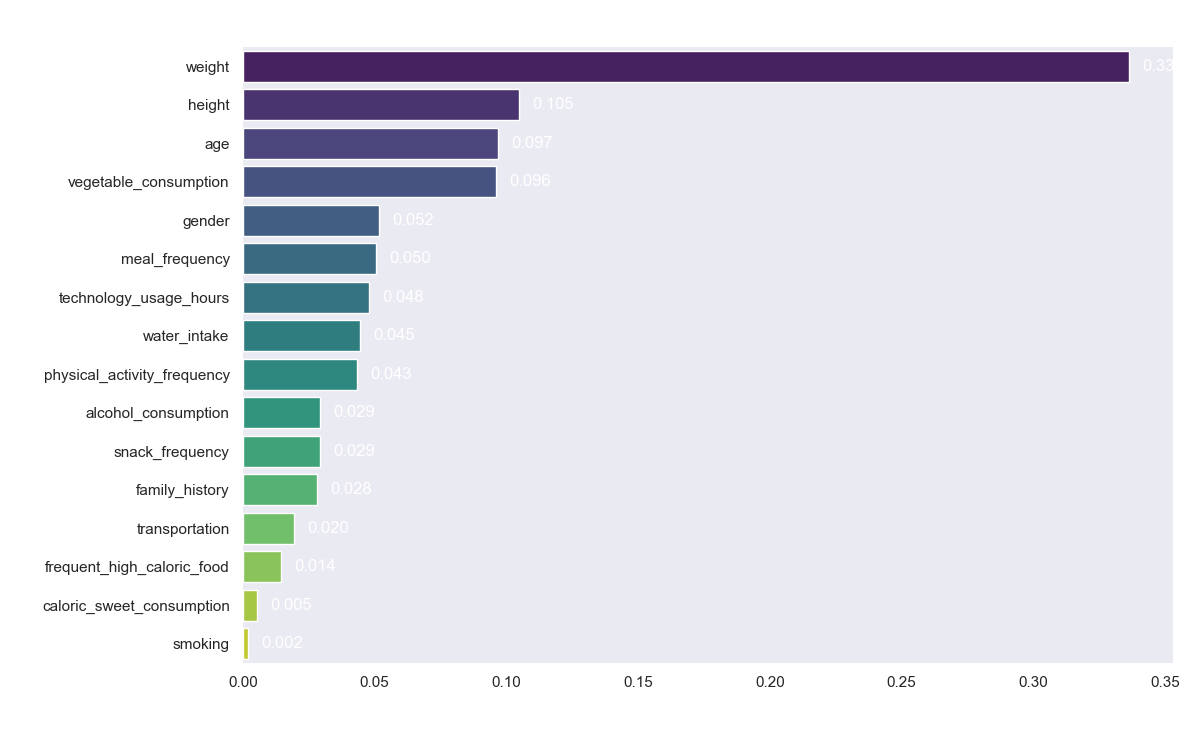

In [129]:
# Get feature importances from the trained Random Forest model
importances = best_rf.feature_importances_

# Create a dataframe for better visualization
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance as a bar chart
# Set dark background theme
sns.set_theme(style="dark")

# Create the figure
plt.figure(figsize=(12, 8))  # Slightly larger for readability

# Create a color palette based on importance values
colors = sns.color_palette("viridis", len(feature_importance_df))

# Generate the bar plot with enhanced styling
ax = sns.barplot(
    x=feature_importance_df["Importance"], 
    y=feature_importance_df["Feature"], 
    palette=colors  # Apply gradient color
)

# Add data labels on bars
for index, value in enumerate(feature_importance_df["Importance"]):
    ax.text(value + 0.005, index, f"{value:.3f}", color="white", fontsize=12, va="center")

# Customize the title
plt.title("Feature Importance in Random Forest Model", fontsize=16, color="white", fontweight="bold", pad=15)

# Customize axis labels
plt.xlabel("Importance", fontsize=14, color="white", labelpad=10)
plt.ylabel("Feature", fontsize=14, color="white", labelpad=10)

# Remove borders for a cleaner look
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()


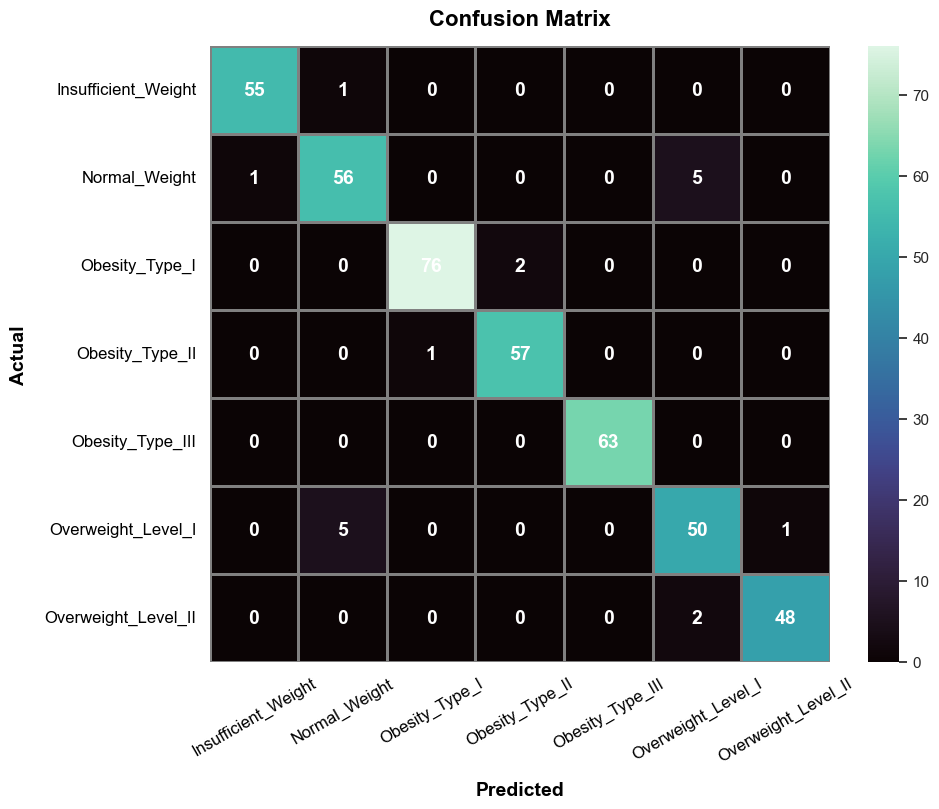

In [127]:
# Generate confusion matrix to analyze model predictions
cm = confusion_matrix(y_test, y_pred_best_rf)

# Plot the confusion matrix using a heatmap
# Set dark background theme
sns.set_theme(style="dark")

# Create figure
plt.figure(figsize=(10, 8))  # Slightly larger for readability

# Generate heatmap with improved styling
ax = sns.heatmap(
    cm,  # Confusion matrix data
    annot=True,  # Show numbers
    fmt='d',  # Integer format
    cmap="mako",  # Dark-friendly colormap
    linewidths=1,  # Add spacing between cells
    linecolor="gray",  # Light gray borders for better visibility
    annot_kws={"size": 14, "color": "white", "weight": "bold"},  # Larger, bolder, white annotations
    xticklabels=label_encoders['obesity_level'].classes_,  # Set x-axis labels
    yticklabels=label_encoders['obesity_level'].classes_   # Set y-axis labels
)

# Customize axes labels
plt.xlabel("Predicted", fontsize=14, color="black", labelpad=12, fontweight="bold")
plt.ylabel("Actual", fontsize=14, color="black", labelpad=12, fontweight="bold")

# Customize title
plt.title("Confusion Matrix", fontsize=16, color="black", fontweight="bold", pad=15)

# Rotate x-axis labels slightly for better readability
plt.xticks(rotation=30, fontsize=12, color="black")
plt.yticks(fontsize=12, color="black")

# Show the plot
plt.show()


In [115]:
from imblearn.over_sampling import SMOTE  # For handling class imbalance (if needed)
# Initialize SMOTE to balance the dataset
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Train a new Random Forest model on the balanced dataset
rf_balanced = RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42)
rf_balanced.fit(X_train_sm, y_train_sm)

# Make predictions on test data
y_pred_balanced = rf_balanced.predict(X_test)

# Evaluate model trained on balanced data
print("Balanced Random Forest Accuracy:", accuracy_score(y_test, y_pred_balanced))
print(classification_report(y_test, y_pred_balanced))


Balanced Random Forest Accuracy: 0.9527186761229315
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.88      0.90      0.89        62
           2       0.99      0.97      0.98        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.86      0.88      0.87        56
           6       0.98      0.96      0.97        50

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



In [117]:
# Compare accuracy of different models
models = {
    "Baseline RF": accuracy_score(y_test, y_pred_rf),
    "Optimized RF": accuracy_score(y_test, y_pred_best_rf),
    "Balanced RF": accuracy_score(y_test, y_pred_balanced)
}

# Print accuracy for each model
for model, accuracy in models.items():
    print(f"{model}: {accuracy:.4f}")


Baseline RF: 0.9574
Optimized RF: 0.9574
Balanced RF: 0.9527
